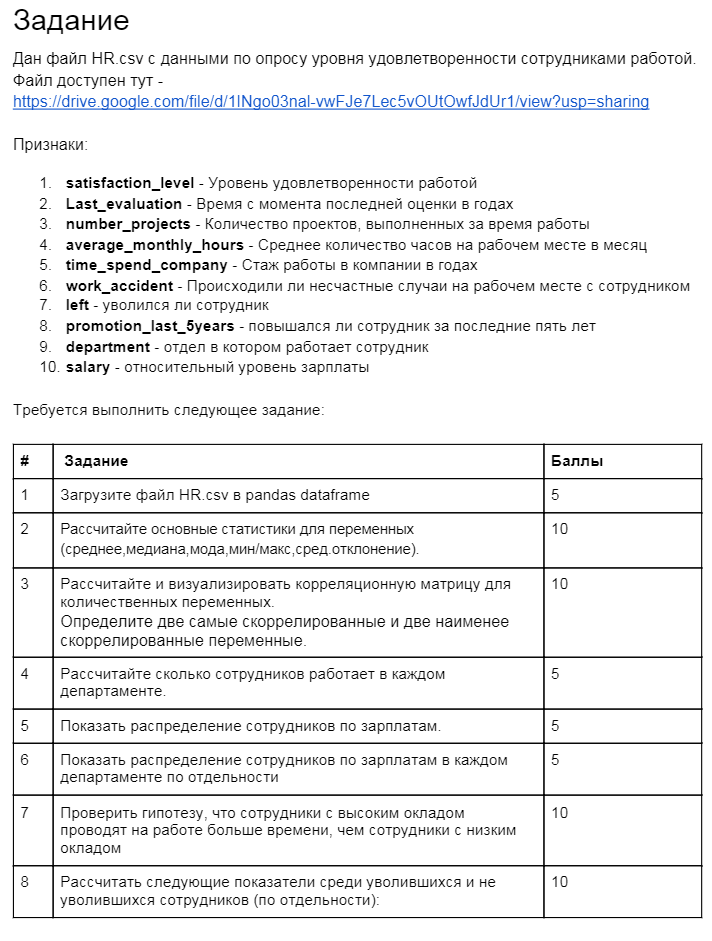

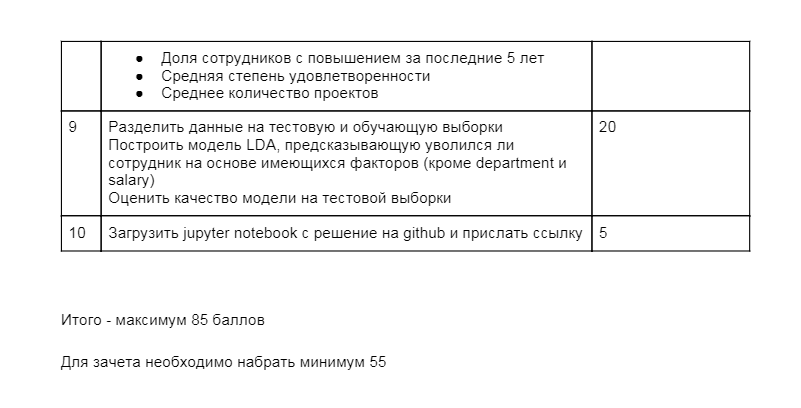

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import scipy.stats as stats
import numpy as np
import math

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

## Задание 1

In [4]:
data = pd.read_csv('HR.csv')

In [5]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Задание 2

In [6]:
data.describe() #Рассчитываем основные статистики

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
data.mode().head(1) #Рассчитаем моду

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002082E149910>]],
      dtype=object)

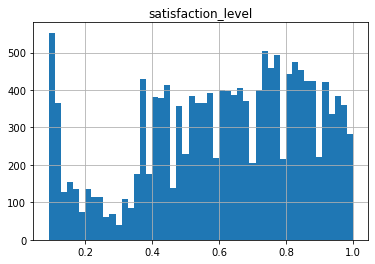

In [8]:
data.hist('satisfaction_level', bins=50) #Видим что распределение уровня удовлетворенности не похоже на нормальное

## Задание 3

In [9]:
corr = data.iloc[:,0:5] #Построим корреляционную матрицу

In [10]:
corr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


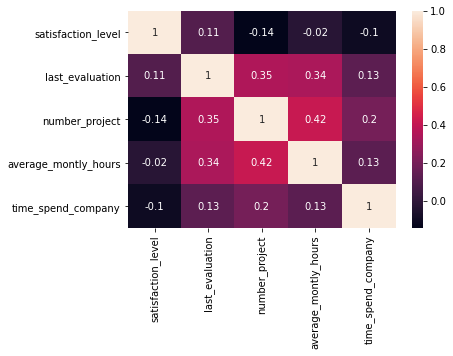

In [11]:
sns.heatmap(corr.corr(),annot = True)

Как видно что наиболее заметная корреляция имеется между количеством проектов и средним числом часов в месяц(0.41), так же есть некоторая корреляция между last_evaluation и number_project	(0.35) и можно отметить average_montly_hours и  last_evaluation(0.34)

## Задание 4

In [12]:
count_emp = data.groupby(by = 'department').count()
count_emp.iloc[:,1] # Вывведем кол-во работников по отделам


department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: last_evaluation, dtype: int64

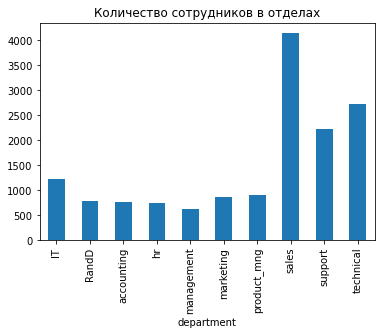

In [20]:
count_emp.iloc[:,1].plot(kind = 'bar', title = 'Количество сотрудников в отделах')

## Задание 5

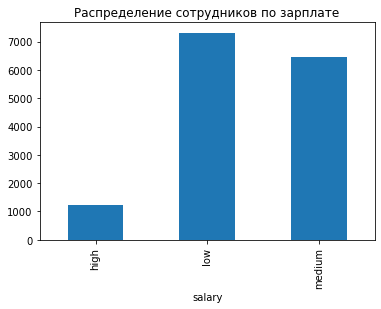

In [13]:
count_sal = data.groupby(by = 'salary').count() # Группируем по уровню зарплаты
count_sal.iloc[:,1]
count_sal.iloc[:,1].plot(kind = 'bar', title = 'Распределение сотрудников по зарплате')

## Задание 6

In [14]:
count_dep_sal = data.groupby(by = ['department','salary']).count() # Группируем по уровню зарплаты в отделах
count_dep_sal.iloc[:,1]
sal_dep = data.pivot_table('satisfaction_level', index = 'department', columns = 'salary', aggfunc = 'count')
sal_dep

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


## Задание 7

In [15]:
data[data['salary'] == 'low'].average_montly_hours.mean() # Найдем кол-во средних часов в месяц у сотрудников с низкой зарплатой

200.9965828321487

In [16]:
data[data['salary'] == 'high'].average_montly_hours.mean() # Найдем кол-во средних часов в месяц у сотрудников с низкой зарплатой

199.86742118027485

H0 Количество равно и работники с низкой зп и высокой работают одинаково <br>
H1 Работники работают разное число часов
Примем уровень значимости alpha = 0.05 (5%)

In [17]:
data[data['salary'] == 'low'].average_montly_hours.array

<PandasArray>
[157, 223, 159, 153, 247, 259, 224, 142, 135, 305,
 ...
 159, 228, 257, 155, 293, 151, 160, 143, 280, 158]
Length: 7316, dtype: int64

In [18]:
stats.ttest_ind(a=data[data['salary'] == 'low'].average_montly_hours.array,b=data[data['salary'] == 'high'].average_montly_hours.array,equal_var=False)

Ttest_indResult(statistic=0.7624331665385475, pvalue=0.4459045542257889)

Как мы видим, pvalue ~ 0.45, что не позволяет нам отклонить нулевую гипотезу.

## Задание 8

#### Доля сотрудников с повышением за последние 5 лет

In [49]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

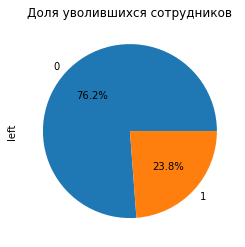

In [38]:
data.left.value_counts().plot(kind = 'pie', title = 'Доля уволившихся сотрудников',  autopct = '%1.1f%%')

Уволилось 23,8% сотрудников

In [43]:
left = data[data.left==1] # Уволились
work = data[data.left==0] # Работают


In [48]:
left.promotion_last_5years.value_counts()

0    3552
1      19
Name: promotion_last_5years, dtype: int64

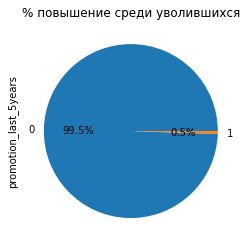

In [52]:
left.promotion_last_5years.value_counts().plot(kind = 'pie', title = '% повышений среди уволившихся',  autopct = '%1.1f%%')

Как мы видим, повышение получило только 0.5% из уволившихся сотрудников

In [50]:
work.promotion_last_5years.value_counts()

0    11128
1      300
Name: promotion_last_5years, dtype: int64

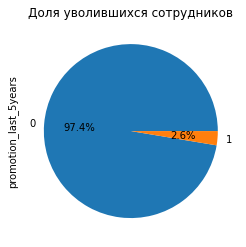

In [51]:
work.promotion_last_5years.value_counts().plot(kind = 'pie', title = '% повышений среди работающих',  autopct = '%1.1f%%')

% повышений среди работающих сотрудников составляет 2.6%

#### Средняя степень удовлетворенности

In [75]:
print(f'Средняя степень удовлетворенности среди уволившихся = {int(round(left.satisfaction_level.mean(),2)*100)}%')

Средняя степень удовлетворенности среди уволившихся = 44%


In [77]:
print(f'Средняя степень удовлетворенности среди работающих = {int(round(work.satisfaction_level.mean(),2)*100)}%')

Средняя степень удовлетворенности среди работающих = 67%


Как мы видим средний % удовлетворенности выше у работающих сотрудников, что логично.

#### Среднее количество проектов

In [80]:
print(f'Среднее количество проектов среди уволившихся = {round(left.number_project.mean(),2)}')

Среднее количество проектов среди уволившихся = 3.86


In [81]:
print(f'Среднее количество проектов среди работающих = {round(work.number_project.mean(),2)}')

Среднее количество проектов среди работающих = 3.79


## Задание 9

Для построения модели LDA необходимо оставить только непрерывные величины

In [84]:
data_d = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours','time_spend_company']]
data_d.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


In [87]:
# определяем независимую переменную (увольнение)
data_p = data.left.values
data_p

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [94]:
# разделяем выборку на тренировочную и тестовую

X_train, X_test, y_train, y_test = train_test_split(data_d, data_p, test_size = 0.25)

In [95]:
lda = LinearDiscriminantAnalysis()
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [96]:
lda.predict(X_test) # Делаем прогноз

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [99]:
result.head(50)

,0,1
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,1
6,1,0
7,0,1
8,0,0
9,1,0


In [101]:
accuracy_score(y_test, lda.predict(X_test)) # Посмотрим на точность модели

0.7605333333333333

Как видим точность модели не самая лучшая и равна 76%

In [102]:
# Найдем коэфф линий
lda.coef_

array([[-4.49078007e+00,  7.04016402e-01, -2.54896152e-01,
         4.47482775e-03,  2.18892700e-01]])

Видим что значимыми являются показатели last_evaluation, average_montly_hours, time_spend_company. Но использовать данную модель для предсказания не рекомендуется, т.к. точность модели довольно низка. Возможно следует использоваться другие модели.